In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [11]:
# load dataset
df = pd.read_csv("ENB2012_data.csv")

# Assign names to Columns
df.columns = ["Relative_compactness", "Surface_area","Wall_area","Roof_area","Overall_height","Orientation",
              "Glazing_area","Glazing_area_distribution","Heating_load","Cooling_load"]

In [12]:
df.head()

,Relative_compactness,Surface_area,Wall_area,Roof_area,Overall_height,Orientation,Glazing_area,Glazing_area_distribution,Heating_load,Cooling_load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Relative_compactness,768.0,0.764167,0.105777,0.62,0.6825,0.75,0.8300,0.98
Surface_area,768.0,671.708333,88.086116,514.50,606.3750,673.75,741.1250,808.50
Wall_area,768.0,318.500000,43.626481,245.00,294.0000,318.50,343.0000,416.50
Roof_area,768.0,176.604167,45.165950,110.25,140.8750,183.75,220.5000,220.50
Overall_height,768.0,5.250000,1.751140,3.50,3.5000,5.25,7.0000,7.00
Orientation,768.0,3.500000,1.118763,2.00,2.7500,3.50,4.2500,5.00
Glazing_area,768.0,0.234375,0.133221,0.00,0.1000,0.25,0.4000,0.40
Glazing_area_distribution,768.0,2.812500,1.550960,0.00,1.7500,3.00,4.0000,5.00
Heating_load,768.0,22.307201,10.090196,6.01,12.9925,18.95,31.6675,43.10
Cooling_load,768.0,24.587760,9.513306,10.90,15.6200,22.08,33.1325,48.03


In [14]:
# check missingvalue
df.isnull().sum()

Relative_compactness         0
Surface_area                 0
Wall_area                    0
Roof_area                    0
Overall_height               0
Orientation                  0
Glazing_area                 0
Glazing_area_distribution    0
Heating_load                 0
Cooling_load                 0
dtype: int64

In [15]:
print("Shape : ",df.shape)

Shape :  (768, 10)


In [16]:
df_Heating_load = df["Heating_load"]
df_Cooling_load = df["Cooling_load"]

<AxesSubplot:xlabel='Heating_load'>

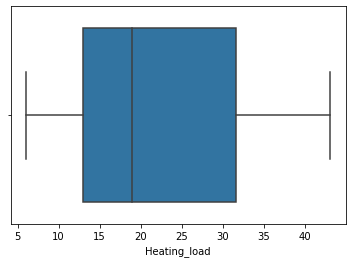

In [17]:
# check the contrary observation
sns.boxplot(x = df_Heating_load)

<AxesSubplot:xlabel='Cooling_load'>

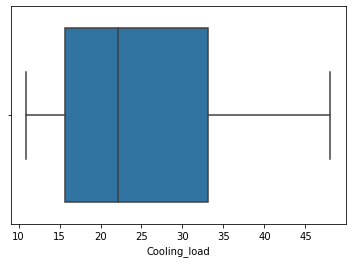

In [18]:
sns.boxplot(x = df_Cooling_load)

We do not have any contradictory observations.<br>
This gives us convenience.

- We have two dependent variables.
- First is **"Heating_load".**
- Second is **"Cooling_load".**

In [19]:
Y = df.iloc[:,8:]
X = df.iloc[:,:8]

### KNN

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 99)

In [58]:
knn_model = KNeighborsRegressor().fit(X_train, Y_train)

In [59]:
print("n_neighbors:",knn_model.n_neighbors)
print("knn_model:",knn_model.metric)

n_neighbors: 5
knn_model: minkowski


In [60]:
y_pred = knn_model.predict(X_test)

In [61]:
np.sqrt(mean_squared_error(Y_test, y_pred))

2.394342156460669

#### Tuning

In [62]:
RMSE = []

for neighbors in range (20):
    neighbors = neighbors + 1
    knn_model = KNeighborsRegressor(n_neighbors = neighbors).fit(X_train, Y_train)
    y_pred = knn_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(Y_test,y_pred))
    RMSE.append(rmse)
    print("neigbors: ",neighbors, "for RMSE values: ",rmse )

neigbors:  1 for RMSE values:  2.979339222835227
neigbors:  2 for RMSE values:  2.694586664649532
neigbors:  3 for RMSE values:  2.242279663281089
neigbors:  4 for RMSE values:  2.2827833213910727
neigbors:  5 for RMSE values:  2.394342156460669
neigbors:  6 for RMSE values:  2.567670670412638
neigbors:  7 for RMSE values:  2.719265987808807
neigbors:  8 for RMSE values:  2.701166129476399
neigbors:  9 for RMSE values:  2.7072955339411324
neigbors:  10 for RMSE values:  2.7429237848988404
neigbors:  11 for RMSE values:  2.7413728371998682
neigbors:  12 for RMSE values:  2.7488334537614203
neigbors:  13 for RMSE values:  2.7699120719130454
neigbors:  14 for RMSE values:  2.7868995401850056
neigbors:  15 for RMSE values:  2.8299727052899137
neigbors:  16 for RMSE values:  2.86301339327166
neigbors:  17 for RMSE values:  2.8896456890536513
neigbors:  18 for RMSE values:  2.9042518080517374
neigbors:  19 for RMSE values:  2.8991345162197906
neigbors:  20 for RMSE values:  2.905458613527520

- Best n_neighbors = 3 

In [63]:
# Thanks The GridSearchCV, We can find best_params quickly.
knn_params = {"n_neighbors": np.arange(1,30,1)}
knn = KNeighborsRegressor()

In [64]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10).fit(X_train,Y_train)

In [65]:
knn_cv_model.best_params_

{'n_neighbors': 3}

In [66]:
# Final model 
knn_final = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"]).fit(X_train,Y_train)

In [67]:
y_pred = knn_final.predict(X_test)

In [68]:
np.sqrt(mean_squared_error(Y_test,y_pred))

2.242279663281089

- We reduced our error from 2.39 to 2.24.So our final model is successful

### Neural Networks

In [91]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [117]:
mlp_model = MLPRegressor().fit(X_train_scaled, Y_train)

In [118]:
y_pred = mlp_model.predict(X_test_scaled)

In [119]:
np.sqrt(mean_squared_error(Y_test, y_pred))

4.6454616551808

### Model Tuning

In [121]:
mlp_params = {"alpha": [0.1,0.01,0.05],
             "hidden_layer_sizes": [(10,20), (100,100)]}


- **alpha** :  L2 penalty (regularization term) parameter. default = 0.0001
- **hidden_layer_sizes** :  The ith element represents the number of neurons in the ith
    hidden layer. default = default=(100,)

In [140]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 5).fit(X_train_scaled,Y_train)

In [141]:
mlp_cv_model.best_params_

{'alpha': 0.1, 'hidden_layer_sizes': (100, 100)}

In [145]:
mlp_tuned = MLPRegressor(alpha = 0.1, hidden_layer_sizes = (100,100)).fit(X_train_scaled, Y_train)

In [146]:
y_pred = mlp_tuned.predict(X_test_scaled)

In [147]:
np.sqrt(mean_squared_error(Y_test, y_pred))

2.784155471459074

-  The error rate was halved.

### Random Forest Regression

In [148]:
rf_model = RandomForestRegressor(random_state = 42).fit(X_train, Y_train)

In [150]:
rf_params = {"max_depth": [5,8,10],
            "max_features": [1,5,10],
            "n_estimators": [200, 500,2000],
            "min_samples_split": [2,10]}

- **max_depth** : The maximum depth of the tree. If None, then nodes are expanded until
    all leaves are pure or until all leaves contain less than
    min_samples_split samples.
- **max_features** : The number of features to consider when looking for the best split. 
- **n_estimators** : The number of trees in the forest.
- **min_samples_split** :The minimum number of samples required to split an internal node.

In [152]:
rf_cv_model = GridSearchCV(rf_model, rf_params, cv = 10, verbose = 1, n_jobs = -1).fit(X_train, Y_train)

Fitting 10 folds for each of 54 candidates, totalling 540 fits


C:\Users\BARKIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\BARKIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\BARKIN\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\BARKIN\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\BARKIN\anaconda3\lib\site-pac

In [153]:
rf_cv_model.best_params_

{'max_depth': 10,
 'max_features': 1,
 'min_samples_split': 2,
 'n_estimators': 2000}

In [156]:
rf_final_model = RandomForestRegressor(random_state = 42, max_depth = 10, max_features = 1,
                                       min_samples_split = 2, n_estimators = 2000).fit(X_train, Y_train)

In [160]:
y_pred = rf_final_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test, y_pred))

1.2697318059723293

### Variable Importance

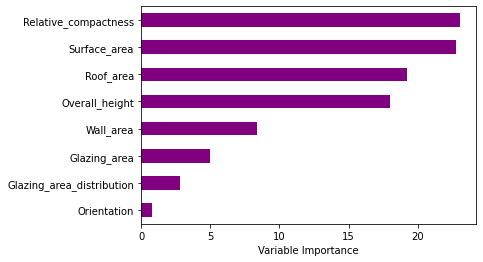

In [161]:
Importance = pd.DataFrame({"Importance": rf_final_model.feature_importances_*100},
                         index = X_train.columns)
Importance.sort_values(by = "Importance",
                      axis = 0,
                      ascending = True).plot(kind = "barh",
                                            color = "purple")
plt.xlabel("Variable Importance")
plt.gca().legend_ = None

### XGB

In [164]:
!pip install xgboost

In [165]:
import xgboost
from xgboost import XGBRegressor

In [166]:
xgb = XGBRegressor().fit(X_train, Y_train)

In [167]:
y_pred = xgb.predict(X_test)

In [168]:
np.sqrt(mean_squared_error(Y_test, y_pred))

0.6046228927047991

In [169]:
xgb_params = {"learning_rate": [0.1,0.01],
             "max_depth": [2,3,5],
             "n_estimators": [100,200],
             "colsample_bytree": [0.4,0.7,1]}

In [177]:
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, Y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [172]:
xgb_cv_model.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 200}

In [173]:
xgb_final_model = XGBRegressor(colsample_bytree = 1, learning_rate = 0.1, max_depth = 5, n_estimators = 200).fit(X_train, Y_train)

In [174]:
y_pred = xgb_final_model.predict(X_test)

In [175]:
np.sqrt(mean_squared_error(Y_test, y_pred))

0.7383519234871362

- Sometimes the default parameters can give more accurate results.

### Variable Importance

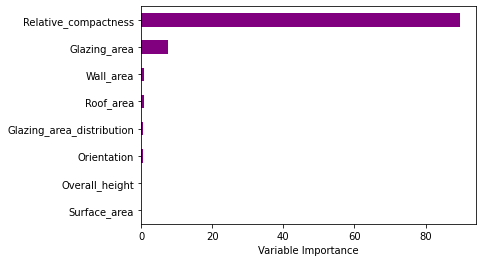

In [178]:
Importance = pd.DataFrame({"Importance": xgb_final_model.feature_importances_*100},
                         index = X_train.columns)
Importance.sort_values(by = "Importance",
                      axis = 0,
                      ascending = True).plot(kind = "barh",
                                            color = "purple")
plt.xlabel("Variable Importance")
plt.gca().legend_ = None

### Result

- Best method is  XGBoost. Relative_compactness is more important then the other features.
- Second importance feature is surface area.
- We can find a correct predict with XGBoost. This project is importance for our planet. Because in the future we'll need renewable energy more than now.